In [1]:
# Step 0. Load libraries and custom modules
# Basic input/output
import pickle
# Matrices and dataframes
import numpy as np
import pandas as pd
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
# Machine Learning
from sklearn.linear_model import LinearRegression
# Metrics
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# Step 1. Load data and prepare

#    (a) Original owners of database:
# 	Marine Resources Division
# 	Marine Research Laboratories - Taroona
# 	Department of Primary Industry and Fisheries, Tasmania
# 	GPO Box 619F, Hobart, Tasmania 7001, Australia
# 	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

#    (b) Donor of database:
# 	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
# 	Department of Computer Science, University of Tasmania
# 	GPO Box 252C, Hobart, Tasmania 7001, Australia

#    (c) Date received: December 1995

# Relevant Information Paragraph:

#    Predicting the age of abalone from physical measurements.  
#    The age of abalone is determined by cutting the shell through the 
#    cone, staining it, and counting the number of rings through a 
#    microscope -- a boring and time-consuming task.  Other 
#    measurements, which are easier to obtain, are used to predict the 
#    age.  Further information, such as weather patterns and location 
#    (hence food availability) may be required to solve the problem.

#    From the original data examples with missing values were removed 
#    (the majority having the predicted value missing), and the ranges 
#    of the continuous values have been scaled for use with an ANN 
#    (by dividing by 200).

#    Data comes from an original (non-machine-learning) study:

# 	Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn 
#   and Wes B Ford (1994) "The Population Biology of Abalone 
#   (_Haliotis_species) in Tasmania. I. Blacklip Abalone (_H. rubra_) 
#   from the North Coast and Islands of Bass Strait", Sea Fisheries 
#   Division, Technical Report No. 48 (ISSN 1034-3288)

#  Attribute information:

#    Given is the attribute name, attribute type, the measurement unit 
#    and a brief description.  The number of rings is the value to 
#    predict: either as a continuous value or as a classification 
#    problem.

# 	Name		    Data Type	Meas.	Description
# 	----		    ---------	-----	-----------
# 	Sex		        nominal			    M, F, and I (infant)
# 	Length		    continuous	mm	    Longest shell measurement
# 	Diameter	    continuous	mm	    perpendicular to length
# 	Height		    continuous	mm	    with meat in shell
# 	Whole weight	continuous	grams	whole abalone
# 	Shucked weight	continuous	grams	weight of meat
# 	Viscera weight	continuous	grams	gut weight (after bleeding)
# 	Shell weight	continuous	grams	after being dried
# 	Rings		    integer			    +1.5 gives the age in years

url = 'https://archive.ics.uci.edu/ml/' + \
    'machine-learning-databases/abalone/abalone.data'
df_raw = pd.read_csv(url, header=None)
df_raw.columns = ['sex','length_mm','diameter_mm','height_mm',
    'whole_weight_gr','shucked_weight_gr','viscera_weigth_gr',
    'shell_weight_gr','rings']

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                4177 non-null   object 
 1   length_mm          4177 non-null   float64
 2   diameter_mm        4177 non-null   float64
 3   height_mm          4177 non-null   float64
 4   whole_weight_gr    4177 non-null   float64
 5   shucked_weight_gr  4177 non-null   float64
 6   viscera_weigth_gr  4177 non-null   float64
 7   shell_weight_gr    4177 non-null   float64
 8   rings              4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df_raw.sample(10)

,sex,length_mm,diameter_mm,height_mm,whole_weight_gr,shucked_weight_gr,viscera_weigth_gr,shell_weight_gr,rings
3645,I,0.475,0.335,0.100,0.4425,0.1895,0.0860,0.1350,9
3789,F,0.645,0.510,0.155,1.1290,0.5015,0.2400,0.3420,10
3884,I,0.290,0.225,0.075,0.1520,0.0710,0.0590,0.0450,9
373,F,0.700,0.575,0.170,1.3100,0.5095,0.3140,0.4200,14
538,M,0.275,0.205,0.070,0.0940,0.0335,0.0200,0.0325,5
2420,M,0.350,0.255,0.085,0.2145,0.1000,0.0465,0.0600,13
151,F,0.605,0.500,0.185,1.1185,0.4690,0.2585,0.3350,9
4099,M,0.670,0.525,0.180,1.4915,0.7280,0.3430,0.3810,9
2854,F,0.650,0.525,0.190,1.3850,0.8875,0.3095,0.4050,11
720,I,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.0050,3


In [5]:
df_interim = df_raw.copy()
df_interim['sex'] = df_interim['sex'].astype('category')
df_interim['age'] = df_interim['rings'] + 1.5

In [6]:
df = df_interim.copy()

In [10]:
X = df.drop(['rings','age'], axis=1)
y = df[['age']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
df_train = pd.concat([X_train,y_train], axis=1)

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
length_mm,3132.0,0.524729,0.119612,0.0750,0.4500,0.54500,0.615000,0.8000
diameter_mm,3132.0,0.408410,0.098746,0.0550,0.3500,0.42500,0.480000,0.6300
height_mm,3132.0,0.139799,0.042385,0.0000,0.1150,0.14500,0.165000,1.1300
whole_weight_gr,3132.0,0.829697,0.488028,0.0020,0.4475,0.80000,1.153000,2.7795
shucked_weight_gr,3132.0,0.359679,0.221254,0.0010,0.1880,0.33625,0.502000,1.4880
viscera_weigth_gr,3132.0,0.181121,0.109618,0.0005,0.0950,0.17100,0.252500,0.7600
shell_weight_gr,3132.0,0.239315,0.138384,0.0015,0.1300,0.23500,0.325625,1.0050
age,3132.0,11.448276,3.257677,2.5000,9.5000,10.50000,12.500000,30.5000


In [13]:
df_train.describe(include='category')

,sex
count,3132
unique,3
top,M
freq,1131


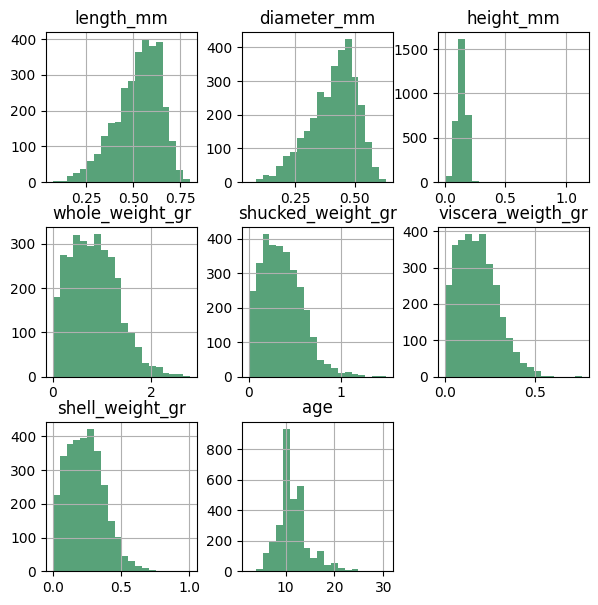

In [29]:
df_train.hist(figsize=(7,7), color='seagreen', alpha=0.8, bins=20)
plt.show()

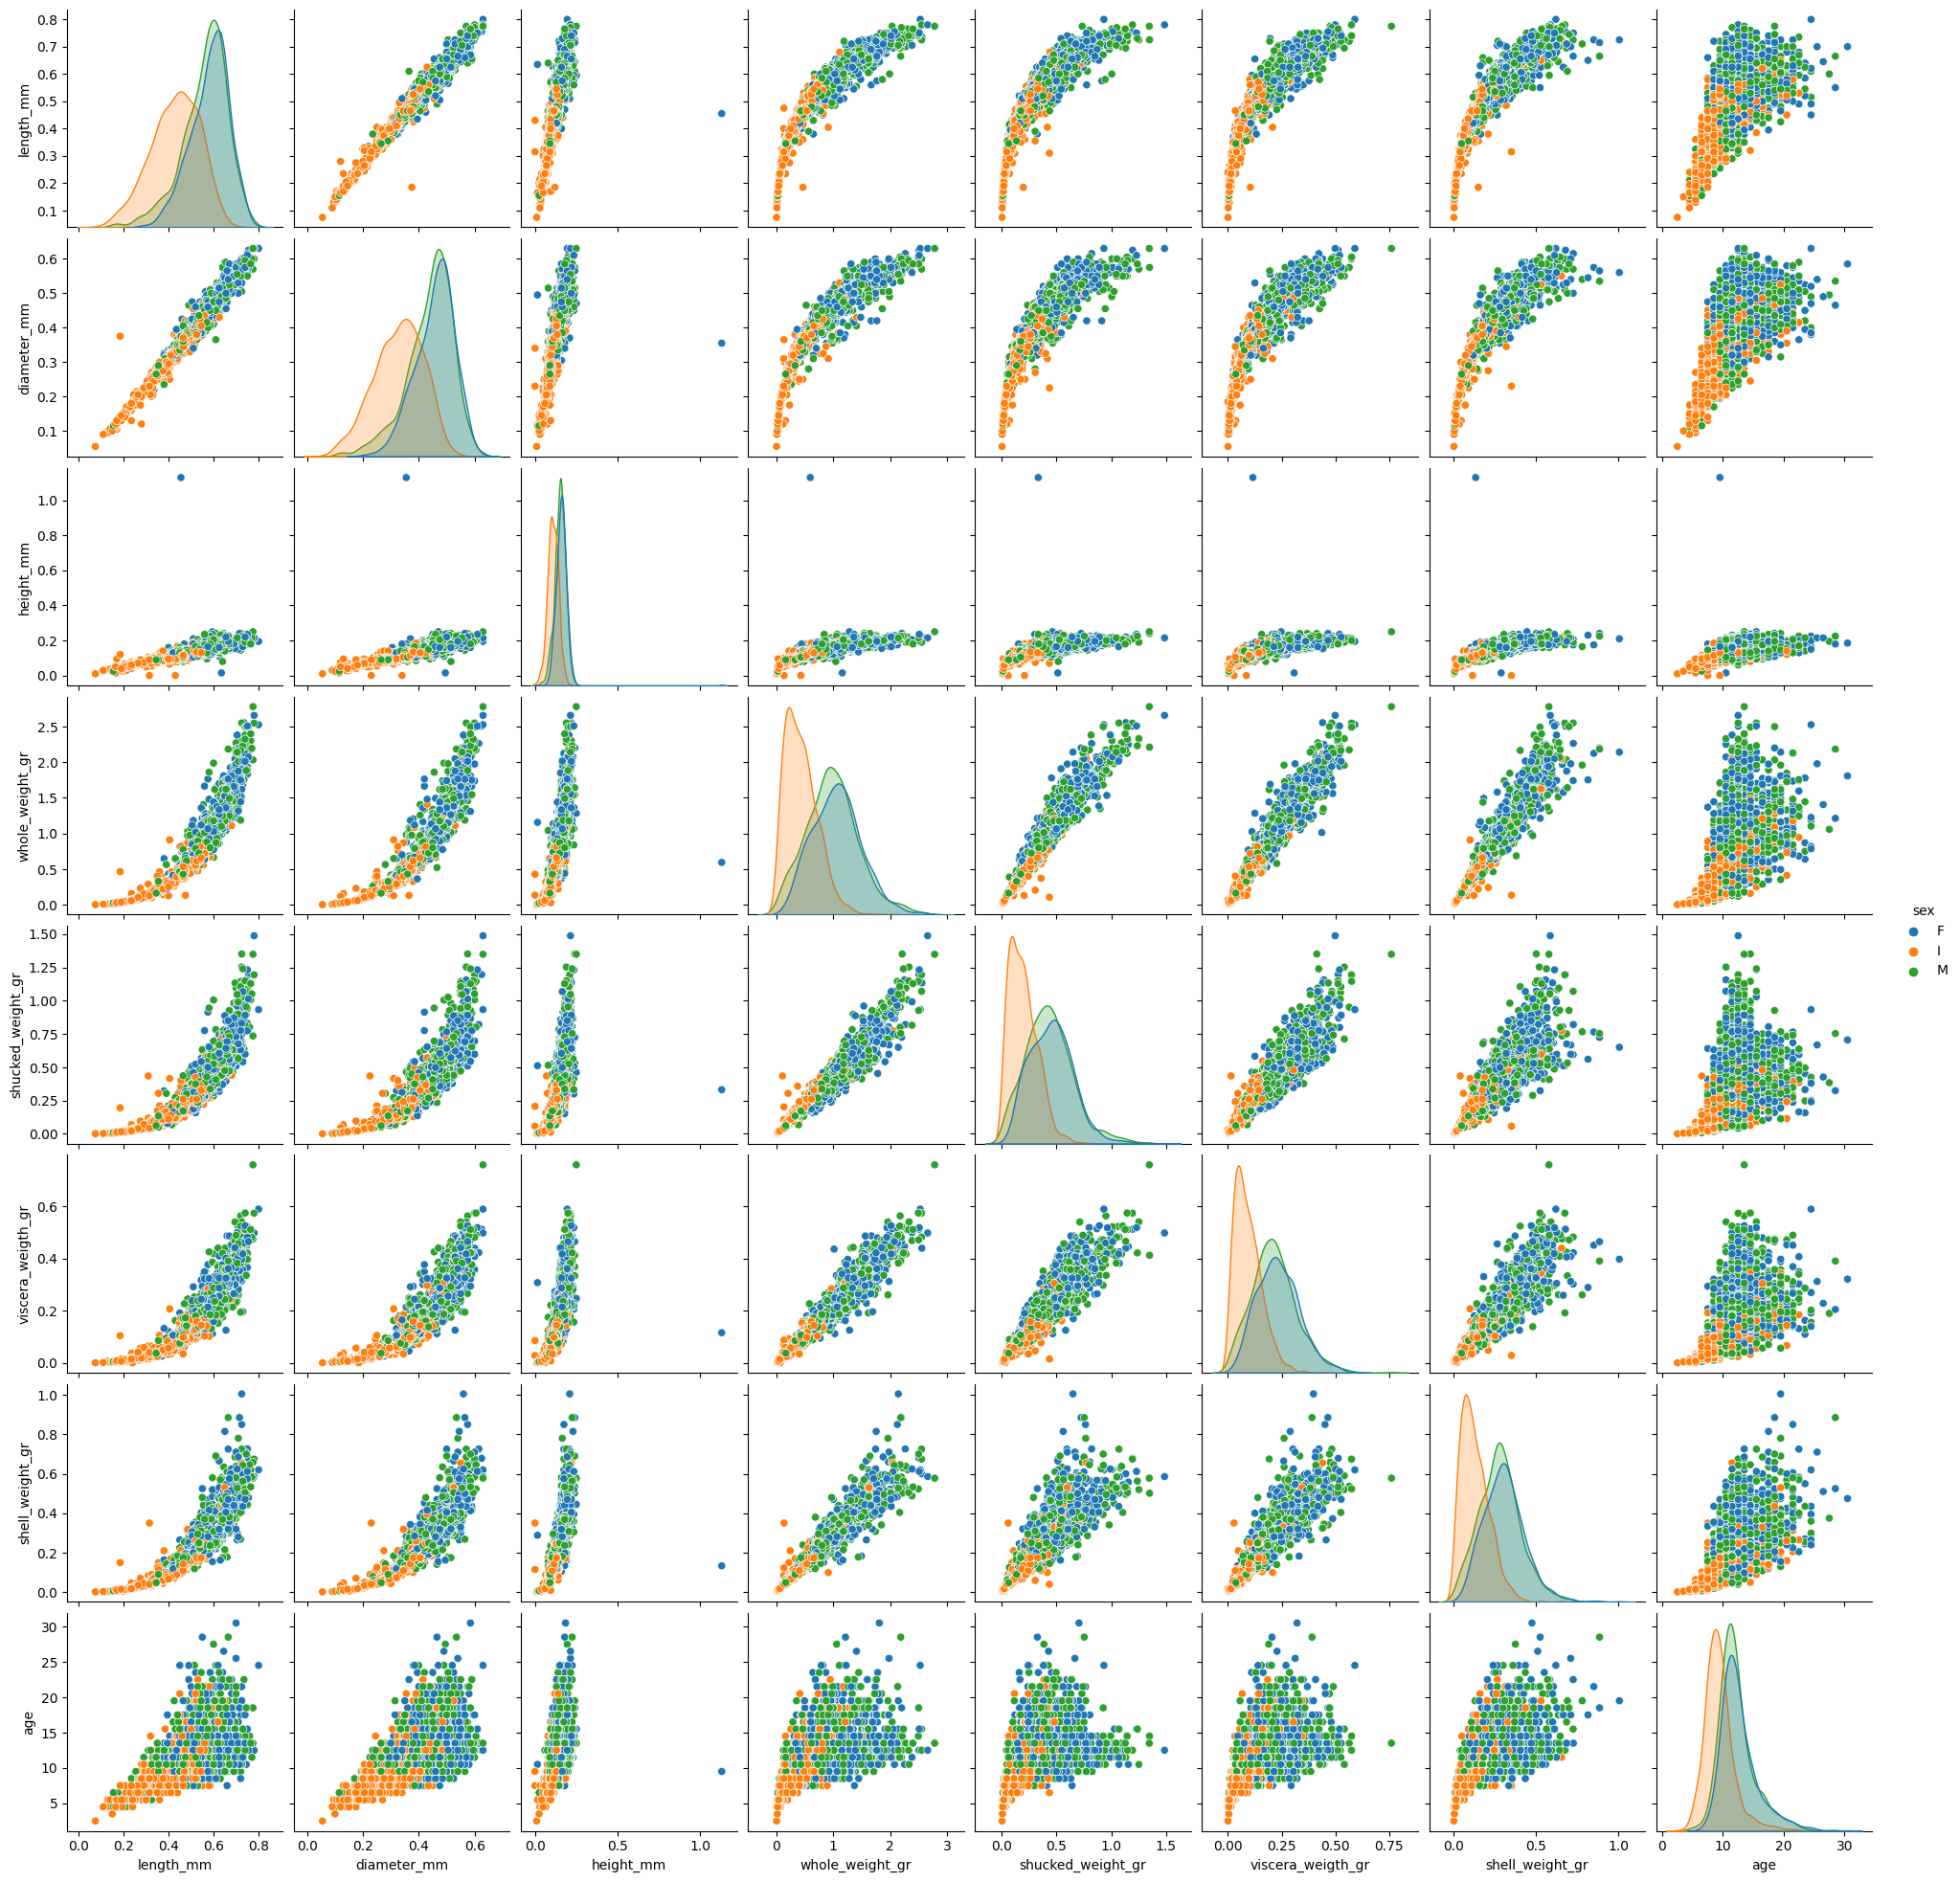

In [20]:
sns.pairplot(data=df_train, hue='sex')
plt.show()

In [31]:
df_train.corr().style.background_gradient(cmap='coolwarm')

,length_mm,diameter_mm,height_mm,whole_weight_gr,shucked_weight_gr,viscera_weigth_gr,shell_weight_gr,age
length_mm,1.000000,0.986065,0.810001,0.924883,0.897512,0.900706,0.896899,0.550201
diameter_mm,0.986065,1.000000,0.815417,0.923724,0.891398,0.895958,0.903741,0.568253
height_mm,0.810001,0.815417,1.000000,0.798391,0.753140,0.778323,0.797246,0.544773
whole_weight_gr,0.924883,0.923724,0.798391,1.000000,0.968707,0.966562,0.954079,0.534042
shucked_weight_gr,0.897512,0.891398,0.753140,0.968707,1.000000,0.932462,0.879557,0.410498
viscera_weigth_gr,0.900706,0.895958,0.778323,0.966562,0.932462,1.000000,0.906747,0.496069
shell_weight_gr,0.896899,0.903741,0.797246,0.954079,0.879557,0.906747,1.000000,0.622547
age,0.550201,0.568253,0.544773,0.534042,0.410498,0.496069,0.622547,1.000000
